<a href="https://colab.research.google.com/github/Kirushikesh/Campus_Recruitment_Prediction/blob/main/CR_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

This data set consists of Placement data of students in a XYZ campus. It includes secondary and higher secondary school percentage and specialization. It also includes degree specialization, type and Work experience and salary offers to the placed students. Link to the dataset https://www.kaggle.com/benroshan/factors-affecting-campus-placement.

The task is to predict whether the student will get recruited or not.

# Understanding the dataset


There are total 12 features (Independent variable) in the dataset to classify the likelihood status of the student in placement (status and salary are Dependent Variable). Those are listed as follows,

1.   **gender** : Candidate gender --> Male='M',Female='F'

2.   **ssc_p** : SSC (10th) Percentage

3.   **ssc_b** : SSC Board of Education --> Central (or) Others

4.  **hsc_p** : HSC (12th) percentage

5. **hsc_b** : HSC Board of Education --> Central/ Others

6. **hsc_s** : Specialization in HSC

7. **degree_p** : Degree Percentage

8. **degree_t** : Under Graduation (Degree type)- Field of degree education

9. **workex** : Work Experience

10. **etest_p** : Employability test percentage ( conducted by college)

11. **specialisation** : Post Graduation(MBA)- Specialization

12. **mba_p** : MBA percentage

13. **status** : Status of placement- Placed/Not placed

14. **salary** : Salary offered by corporate to candidates

# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures.

In [ ]:
import pandas as pd
import os

import numpy as np
import sklearn

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Get the Data

## Download the Data

In [ ]:
from google.colab import files

def fetch_data_from_kaggle():
    files.upload()
    ! mkdir ~/.kaggle
    ! cp kaggle.json ~/.kaggle/
    ! chmod 600 ~/.kaggle/kaggle.json
    ! kaggle datasets download -d benroshan/factors-affecting-campus-placement
    ! unzip factors-affecting-campus-placement.zip

In [ ]:
fetch_data_from_kaggle()

Saving kaggle.json to kaggle.json
  0% 0.00/4.51k [00:00<?, ?B/s]
100% 4.51k/4.51k [00:00<00:00, 9.10MB/s]
Archive:  factors-affecting-campus-placement.zip
  inflating: Placement_Data_Full_Class.csv  


## Take a Quick Look at the Data Structure

In [ ]:
recruitment=pd.read_csv('Placement_Data_Full_Class.csv')
recruitment.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [ ]:
recruitment.shape

(215, 15)

In [ ]:
recruitment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


Saving figure Categorical Column visualization


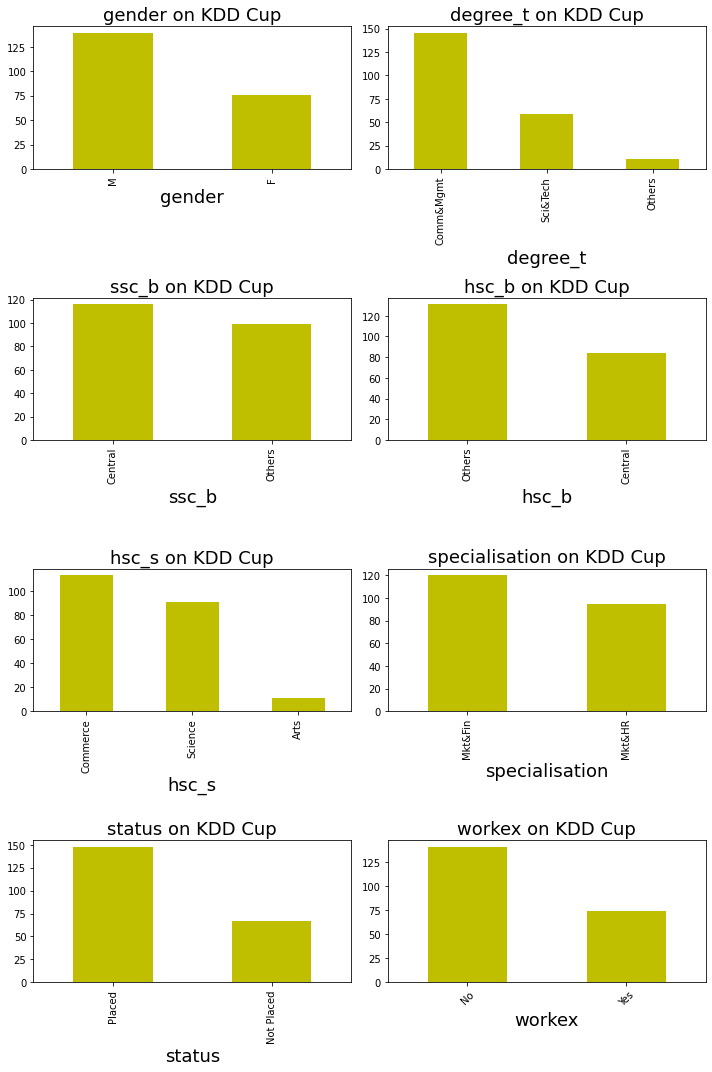

In [ ]:
categorical_features=['gender','degree_t','ssc_b','hsc_b','hsc_s','specialisation','status','workex']
def plot_dist(col, ax):
    recruitment[col].value_counts().plot(kind='bar', facecolor='y', ax=ax)
    ax.set_xlabel('{}'.format(col), fontsize=18)
    ax.set_title("{} on KDD Cup".format(col), fontsize= 18)
    plt.xticks(rotation=45)
    return ax

f, ax = plt.subplots(4,2, figsize = (10,15))
f.tight_layout(h_pad=15, w_pad=10, rect=[0, 0.08, 1, 0.93])

k = 0
for i in range(4):
    for j in range(2):
        plot_dist(categorical_features[k], ax[i][j])
        k += 1

save_fig('Categorical Column visualization')
plt.show()

In [ ]:
recruitment['status'].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

In [ ]:
recruitment.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


Saving figure attribute_histogram_plots


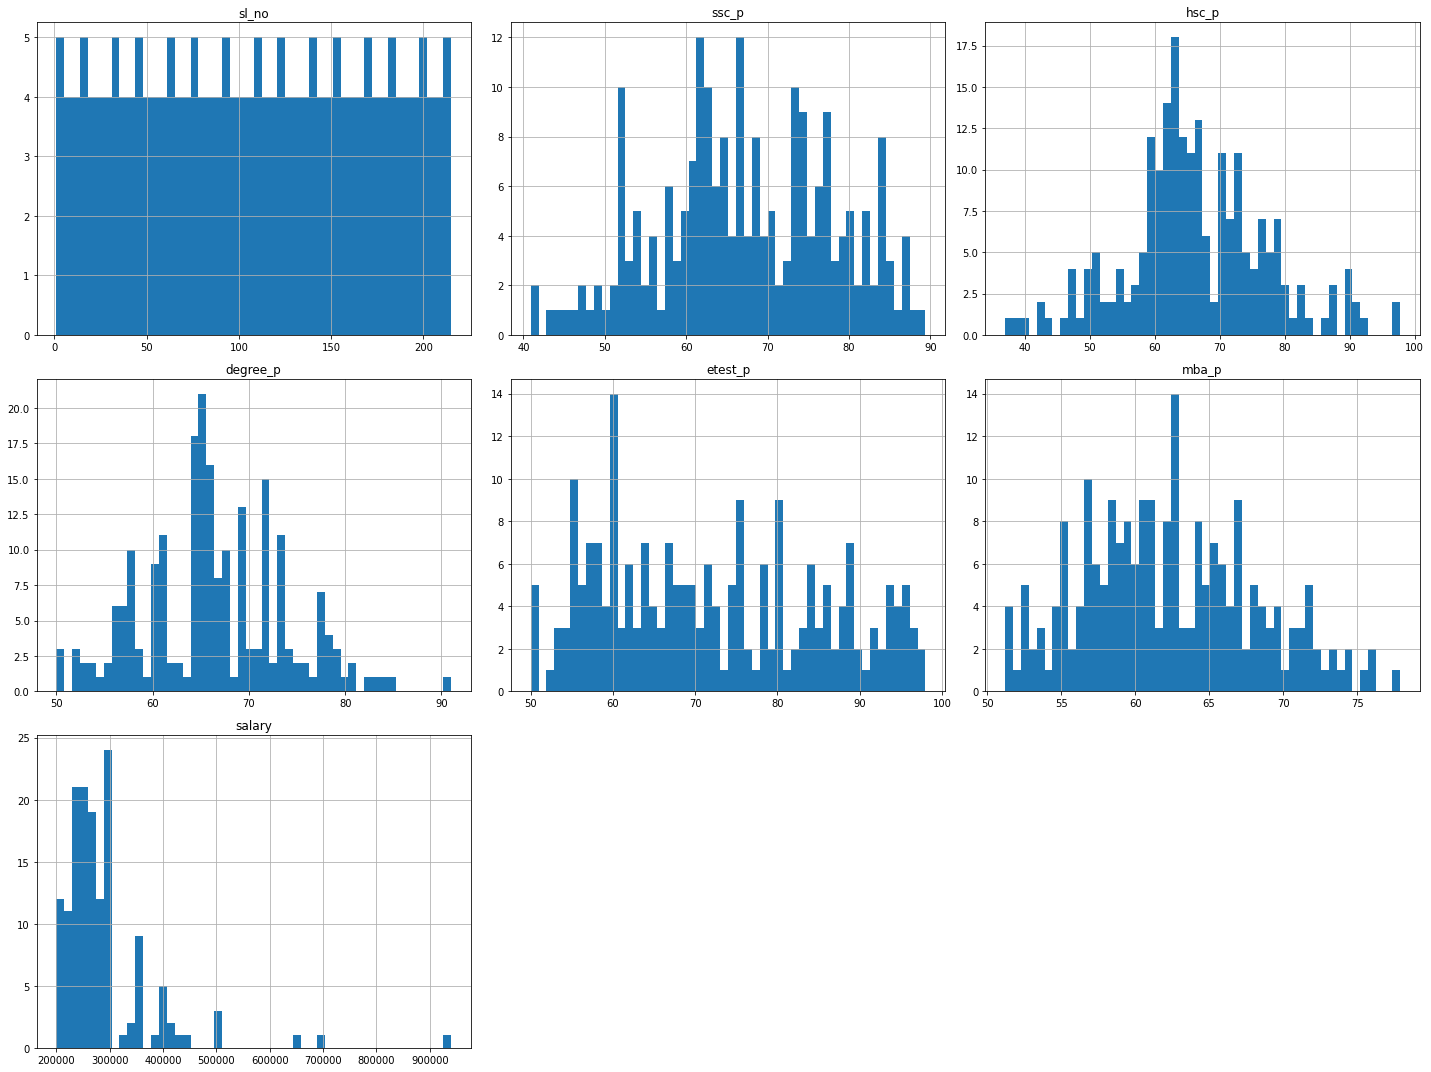

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

recruitment.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

## Create a Test Set

Since to avoid gender bias we split the test dataset with same ratio of male and female compared to original dataset.

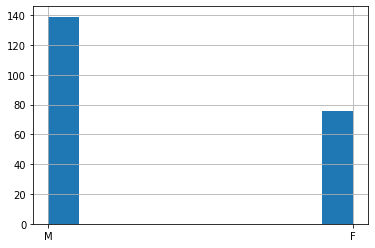

In [ ]:
recruitment['gender'].hist()

In [ ]:
#Stratified sampling can also be done using sklearn train_test_split using the parameter stratify
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(recruitment, recruitment["gender"]):
    strat_train_set = recruitment.loc[train_index]
    strat_test_set = recruitment.loc[test_index]

In [ ]:
strat_test_set["gender"].value_counts() / len(strat_test_set)

M    0.651163
F    0.348837
Name: gender, dtype: float64

In [ ]:
recruitment['gender'].value_counts() / len(recruitment)

M    0.646512
F    0.353488
Name: gender, dtype: float64

# Discover and Visualize the Data to Gain Insights

In [ ]:
recruitment = strat_train_set.copy()

## Visualizing the data in deep

Saving figure work experience vs status


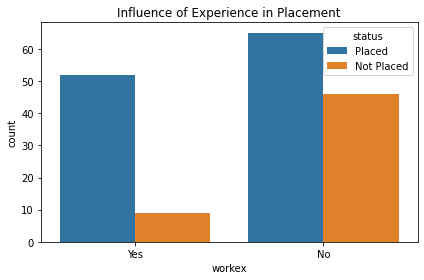

In [ ]:
import seaborn as sns

sns.countplot(x = 'workex',hue = "status",data = recruitment).set(title='Influence of Experience in Placement')
save_fig("work experience vs status")
plt.show()

This figure states that according to the data the workexperience of a candidate does not play a major role in recruitment.

Saving figure Degree vs Recruitment


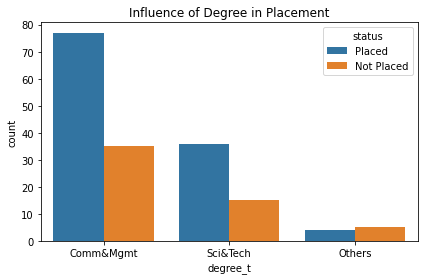

In [ ]:
import seaborn as sns

sns.countplot(x="degree_t", hue="status", data=recruitment).set(title='Influence of Degree in Placement')
save_fig("Degree vs Recruitment")
plt.show()


1.   The students opted for following fields:
    1.   Science and Technology (must be science students)
    2.   Commerce and management (might be a mixture of commerce and Arts)
    3.   Others


2.   There is not much difference in performace of students from Science and Commerce but there but students who opted for "Others" have low performance.

3.   Looks like Commerce and Science degree students are preffered by companies which is obvious. Students who opted for Others have very low placement chance.

Saving figure High School Specialization vs Recruitment


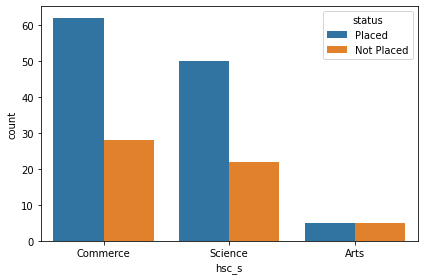

In [ ]:
import seaborn as sns

sns.countplot(x="hsc_s", hue="status", data=recruitment)
save_fig("High School Specialization vs Recruitment")
plt.show()



1.   The most popular branch turns out to be commerce or maybe as most of students get average marks so they were admitted to got commerce on based of their marks. Science is the second most popular and the least popular is arts.

2.   Almost every branch students performed equally but commerce students have slightly better score than other two.

3.   Looking at the fraction of placed and not placed we can say that science branch students have more chance of getting placed than commerce students and most around 45% of the students in arts are not placed




## Looking for Correlations

In [ ]:
recruitment['Recruitment']=(recruitment['status']=='Placed').astype(np.int)

corr_matrix = recruitment.corr()

In [ ]:
corr_matrix["Recruitment"].sort_values(ascending=False)

Recruitment    1.000000
ssc_p          0.595711
hsc_p          0.488783
degree_p       0.469273
etest_p        0.115824
mba_p          0.104143
sl_no         -0.031331
salary              NaN
Name: Recruitment, dtype: float64

## Experiment with Attribute Combination

Instead of using all the single marks of the student across ssc,hsc,degree_p and, mba_p we try to combine all these marks and check how this helps with recuitment

In [ ]:
recruitment['Total Marks across carrer']=recruitment['ssc_p']*recruitment['hsc_p']*recruitment['degree_p']*recruitment['mba_p']
recruitment['Performance in MBA']=recruitment['etest_p']*recruitment['mba_p']

In [ ]:
corr_matrix = recruitment.corr()
corr_matrix["Recruitment"].sort_values(ascending=False)

Recruitment                  1.000000
ssc_p                        0.595711
Total Marks across carrer    0.526211
hsc_p                        0.488783
degree_p                     0.469273
Performance in MBA           0.146534
etest_p                      0.115824
mba_p                        0.104143
sl_no                       -0.031331
salary                            NaN
Name: Recruitment, dtype: float64

In [ ]:
recruitment.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,Recruitment,Total Marks across carrer,Performance in MBA
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,117.000000,172.000000,1.720000e+02,172.000000
mean,108.639535,66.800640,66.136802,66.024419,73.163953,62.321453,294025.641026,0.680233,1.906678e+07,4577.179719
std,60.983252,10.912445,10.807799,7.312235,13.351163,5.942436,101642.499048,0.467748,7.955010e+06,1038.588984
min,2.000000,40.890000,37.000000,50.000000,50.000000,51.290000,200000.000000,0.000000,5.397782e+06,2836.900000
25%,56.750000,59.870000,60.950000,61.000000,60.000000,57.875000,240000.000000,0.000000,1.288175e+07,3740.027500
50%,108.500000,66.250000,64.500000,65.300000,72.075000,61.885000,265000.000000,1.000000,1.838420e+07,4375.080000
75%,158.250000,75.100000,73.000000,71.062500,84.452500,66.325000,300000.000000,1.000000,2.288679e+07,5356.562000
max,215.000000,89.400000,97.700000,85.000000,98.000000,77.890000,940000.000000,1.000000,4.503394e+07,7208.574000


# Prepare the Data for ML Algorithms

In [ ]:
recruitment=strat_train_set.drop(['status','salary','sl_no'],axis=1)
recruitment_labels=strat_train_set['status'].copy()

In [ ]:
recruitment_labels=(recruitment_labels=='Placed').astype(np.int)

In [ ]:
recruitment

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
28,M,76.76,Others,76.50,Others,Commerce,67.5,Comm&Mgmt,Yes,73.35,Mkt&Fin,64.15
121,F,64.00,Central,67.00,Others,Science,69.6,Sci&Tech,Yes,55.67,Mkt&HR,71.49
21,F,79.00,Others,76.00,Others,Commerce,85.0,Comm&Mgmt,No,95.00,Mkt&Fin,69.06
52,F,40.89,Others,45.83,Others,Commerce,53.0,Comm&Mgmt,No,71.20,Mkt&HR,65.49
146,M,62.00,Central,63.00,Others,Science,66.0,Comm&Mgmt,No,85.00,Mkt&HR,55.14
...,...,...,...,...,...,...,...,...,...,...,...,...
119,M,60.80,Central,68.40,Central,Commerce,64.6,Comm&Mgmt,Yes,82.66,Mkt&Fin,64.34
211,M,58.00,Others,60.00,Others,Science,72.0,Sci&Tech,No,74.00,Mkt&Fin,53.62
201,M,54.20,Central,63.00,Others,Science,58.0,Comm&Mgmt,No,79.00,Mkt&HR,58.44
69,M,73.00,Central,73.00,Central,Science,66.0,Sci&Tech,Yes,70.00,Mkt&Fin,68.07


In [ ]:
recruitment.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p'],
      dtype='object')

## Data Cleaning

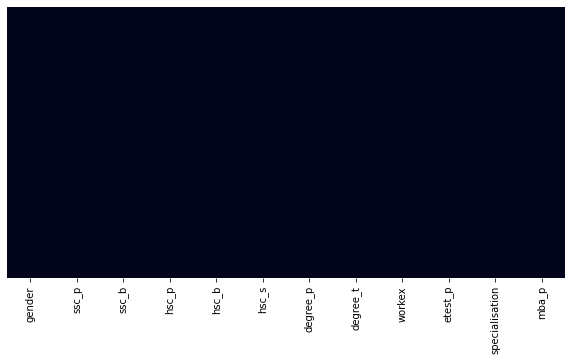

In [ ]:
import seaborn as sns

%matplotlib inline
plt.figure(figsize=(10,5))
sns.heatmap(recruitment.isnull(),yticklabels=False,cbar=False)

plt.show()

There is no null values so no need to impute the data

In [ ]:
recruitment.duplicated().sum()

0

## Handling Text and Categorical Attributes

In [ ]:
recruitment_cat=recruitment[['gender','workex','specialisation','ssc_b','hsc_b','hsc_s']]
recruitment_cat.head(10)

,gender,workex,specialisation,ssc_b,hsc_b,hsc_s
28,M,Yes,Mkt&Fin,Others,Others,Commerce
121,F,Yes,Mkt&HR,Central,Others,Science
21,F,No,Mkt&Fin,Others,Others,Commerce
52,F,No,Mkt&HR,Others,Others,Commerce
146,M,No,Mkt&HR,Central,Others,Science
156,M,Yes,Mkt&HR,Central,Central,Science
23,F,Yes,Mkt&Fin,Others,Others,Science
167,M,Yes,Mkt&Fin,Others,Others,Science
2,M,No,Mkt&Fin,Central,Central,Arts
55,M,No,Mkt&HR,Central,Others,Science


Since these are not ordinal features we need to use the onehotencoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(handle_unknown='ignore')
recruitment_cat_1hot = cat_encoder.fit_transform(recruitment_cat)
recruitment_cat_1hot

<172x13 sparse matrix of type '<class 'numpy.float64'>'
	with 1032 stored elements in Compressed Sparse Row format>

By default, the OneHotEncoder class returns a sparse array, but we can convert it to a dense array if needed by calling the toarray() method:

In [ ]:
recruitment_cat_1hot.toarray()

array([[0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 0., 1.]])

In [ ]:
cat_encoder.categories_

[array(['F', 'M'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Mkt&Fin', 'Mkt&HR'], dtype=object),
 array(['Central', 'Others'], dtype=object),
 array(['Central', 'Others'], dtype=object),
 array(['Arts', 'Commerce', 'Science'], dtype=object)]

## Custom Transformer

Let's create a custom transformer to add extra attributes:

In [ ]:
recruitment_num=recruitment.drop(['gender','workex','specialisation','ssc_b','hsc_b','hsc_s','degree_t'],axis=1)

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
ssc_ix, hsc_ix, degree_ix, mba_ix,etest_ix = 0, 1, 2, 4,3

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_college_score=True): # no *args or **kargs
        self.add_college_score = add_college_score
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        X=np.array(X)
        synthetic1 = X[:, ssc_ix]*X[:, hsc_ix]*X[:, degree_ix]*X[:, mba_ix]
        if self.add_college_score:
            synthetic2 = X[:,etest_ix]*X[:, mba_ix]
            return np.c_[X, synthetic1,synthetic2]
        else:
            return np.c_[X,synthetic1]

attr_adder = CombinedAttributesAdder(add_college_score=False)
recruitment_extra_attribs = attr_adder.transform(recruitment_num.values)

In [ ]:
recruitment_extra_attribs = pd.DataFrame(
    recruitment_extra_attribs,
    columns=list(recruitment_num.columns)+["Total marks across carrer"],
    index=recruitment_num.index)

recruitment_extra_attribs.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,Total marks across carrer
28,76.76,76.50,67.5,73.35,64.15,2.542710e+07
121,64.00,67.00,69.6,55.67,71.49,2.133582e+07
21,79.00,76.00,85.0,95.00,69.06,3.524408e+07
52,40.89,45.83,53.0,71.20,65.49,6.504559e+06
146,62.00,63.00,66.0,85.00,55.14,1.421487e+07


## Transformer Pipelines

Now let's build a pipeline for preprocessing the numerical attributes:

In [ ]:
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

recruitment_num_tr = num_pipeline.fit_transform(recruitment_num)

In [ ]:
recruitment_num_tr 

array([[ 0.91532549,  0.96166256,  0.20238541, ...,  0.30860833,
         0.80187023,  0.1238191 ],
       [-0.25739572,  0.08010123,  0.49041382, ...,  1.54739836,
         0.28606612, -0.57681669],
       [ 1.12119505,  0.9152646 ,  2.60262217, ...,  1.13728123,
         2.03953594,  1.91539832],
       ...,
       [-1.15807502, -0.29108249, -1.10060026, ..., -0.65508254,
        -0.94466345,  0.03822094],
       [ 0.56975874,  0.63687681, -0.00334917, ...,  0.97019647,
         0.61453335,  0.18127322],
       [-0.99264413, -1.31183771, -1.92353858, ..., -0.48799778,
        -1.26926948, -0.6323113 ]])

In [ ]:
from sklearn.compose import ColumnTransformer

num_attribs = list(recruitment_num)
cat_attribs = ['gender','workex','specialisation','ssc_b','hsc_b','hsc_s','degree_t']

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(handle_unknown='ignore'), cat_attribs),
    ])

recruitment_prepared = full_pipeline.fit_transform(recruitment)

In [ ]:
recruitment_prepared

array([[ 0.91532549,  0.96166256,  0.20238541, ...,  1.        ,
         0.        ,  0.        ],
       [-0.25739572,  0.08010123,  0.49041382, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.12119505,  0.9152646 ,  2.60262217, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-1.15807502, -0.29108249, -1.10060026, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.56975874,  0.63687681, -0.00334917, ...,  0.        ,
         0.        ,  1.        ],
       [-0.99264413, -1.31183771, -1.92353858, ...,  0.        ,
         0.        ,  1.        ]])

In [ ]:
recruitment_prepared.shape

(172, 23)

## Balancing The Dataset

The training dataset seems to be unbalanced with no of students recruited has a larger number then non recruited students

In [ ]:
recruitment_labels.value_counts()

1    117
0     55
Name: status, dtype: int64

Applying Synthetic Minority Oversampling Technique to the training data

In [ ]:
from imblearn.over_sampling import SMOTE

oversampling = SMOTE(random_state = 42)
recruitment_balanced,recruitment_b_label = oversampling.fit_resample(recruitment_prepared,recruitment_labels)

In [ ]:
from collections import Counter

Counter(recruitment_b_label)

Counter({0: 117, 1: 117})

In [ ]:
recruitment_balanced.shape

(234, 23)

In [ ]:
from imblearn.pipeline import Pipeline

balanced_full_pipeline=Pipeline([
    ('preparation',full_pipeline),
    ('smote',SMOTE(random_state = 42))
])

recruitment_final,recruitment_flabels=balanced_full_pipeline.fit_resample(recruitment,recruitment_labels)

# Select and Train a Model

## Training and Evaluating on the Training Set

Since we dont have large training set to divide the training set into validation set we need to use cross validation to find the hyperparameters

### Logistic Regression


In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf=SGDClassifier(loss='log')
sgd_clf.fit(recruitment_final,recruitment_flabels)

SGDClassifier(loss='log')

Lets Check the performance in Training Data

In [ ]:
from sklearn.metrics import accuracy_score

recruitment_predictions=sgd_clf.predict(recruitment_final)
accuracy_score(recruitment_flabels,recruitment_predictions)

0.8931623931623932

### Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_clf=DecisionTreeClassifier(random_state=42, max_depth=3)
tree_clf.fit(recruitment_final,recruitment_flabels)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
recruitment_predictions=tree_clf.predict(recruitment_final)
accuracy_score(recruitment_flabels,recruitment_predictions)

0.8717948717948718

Saving figure Trained Decision Tree


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


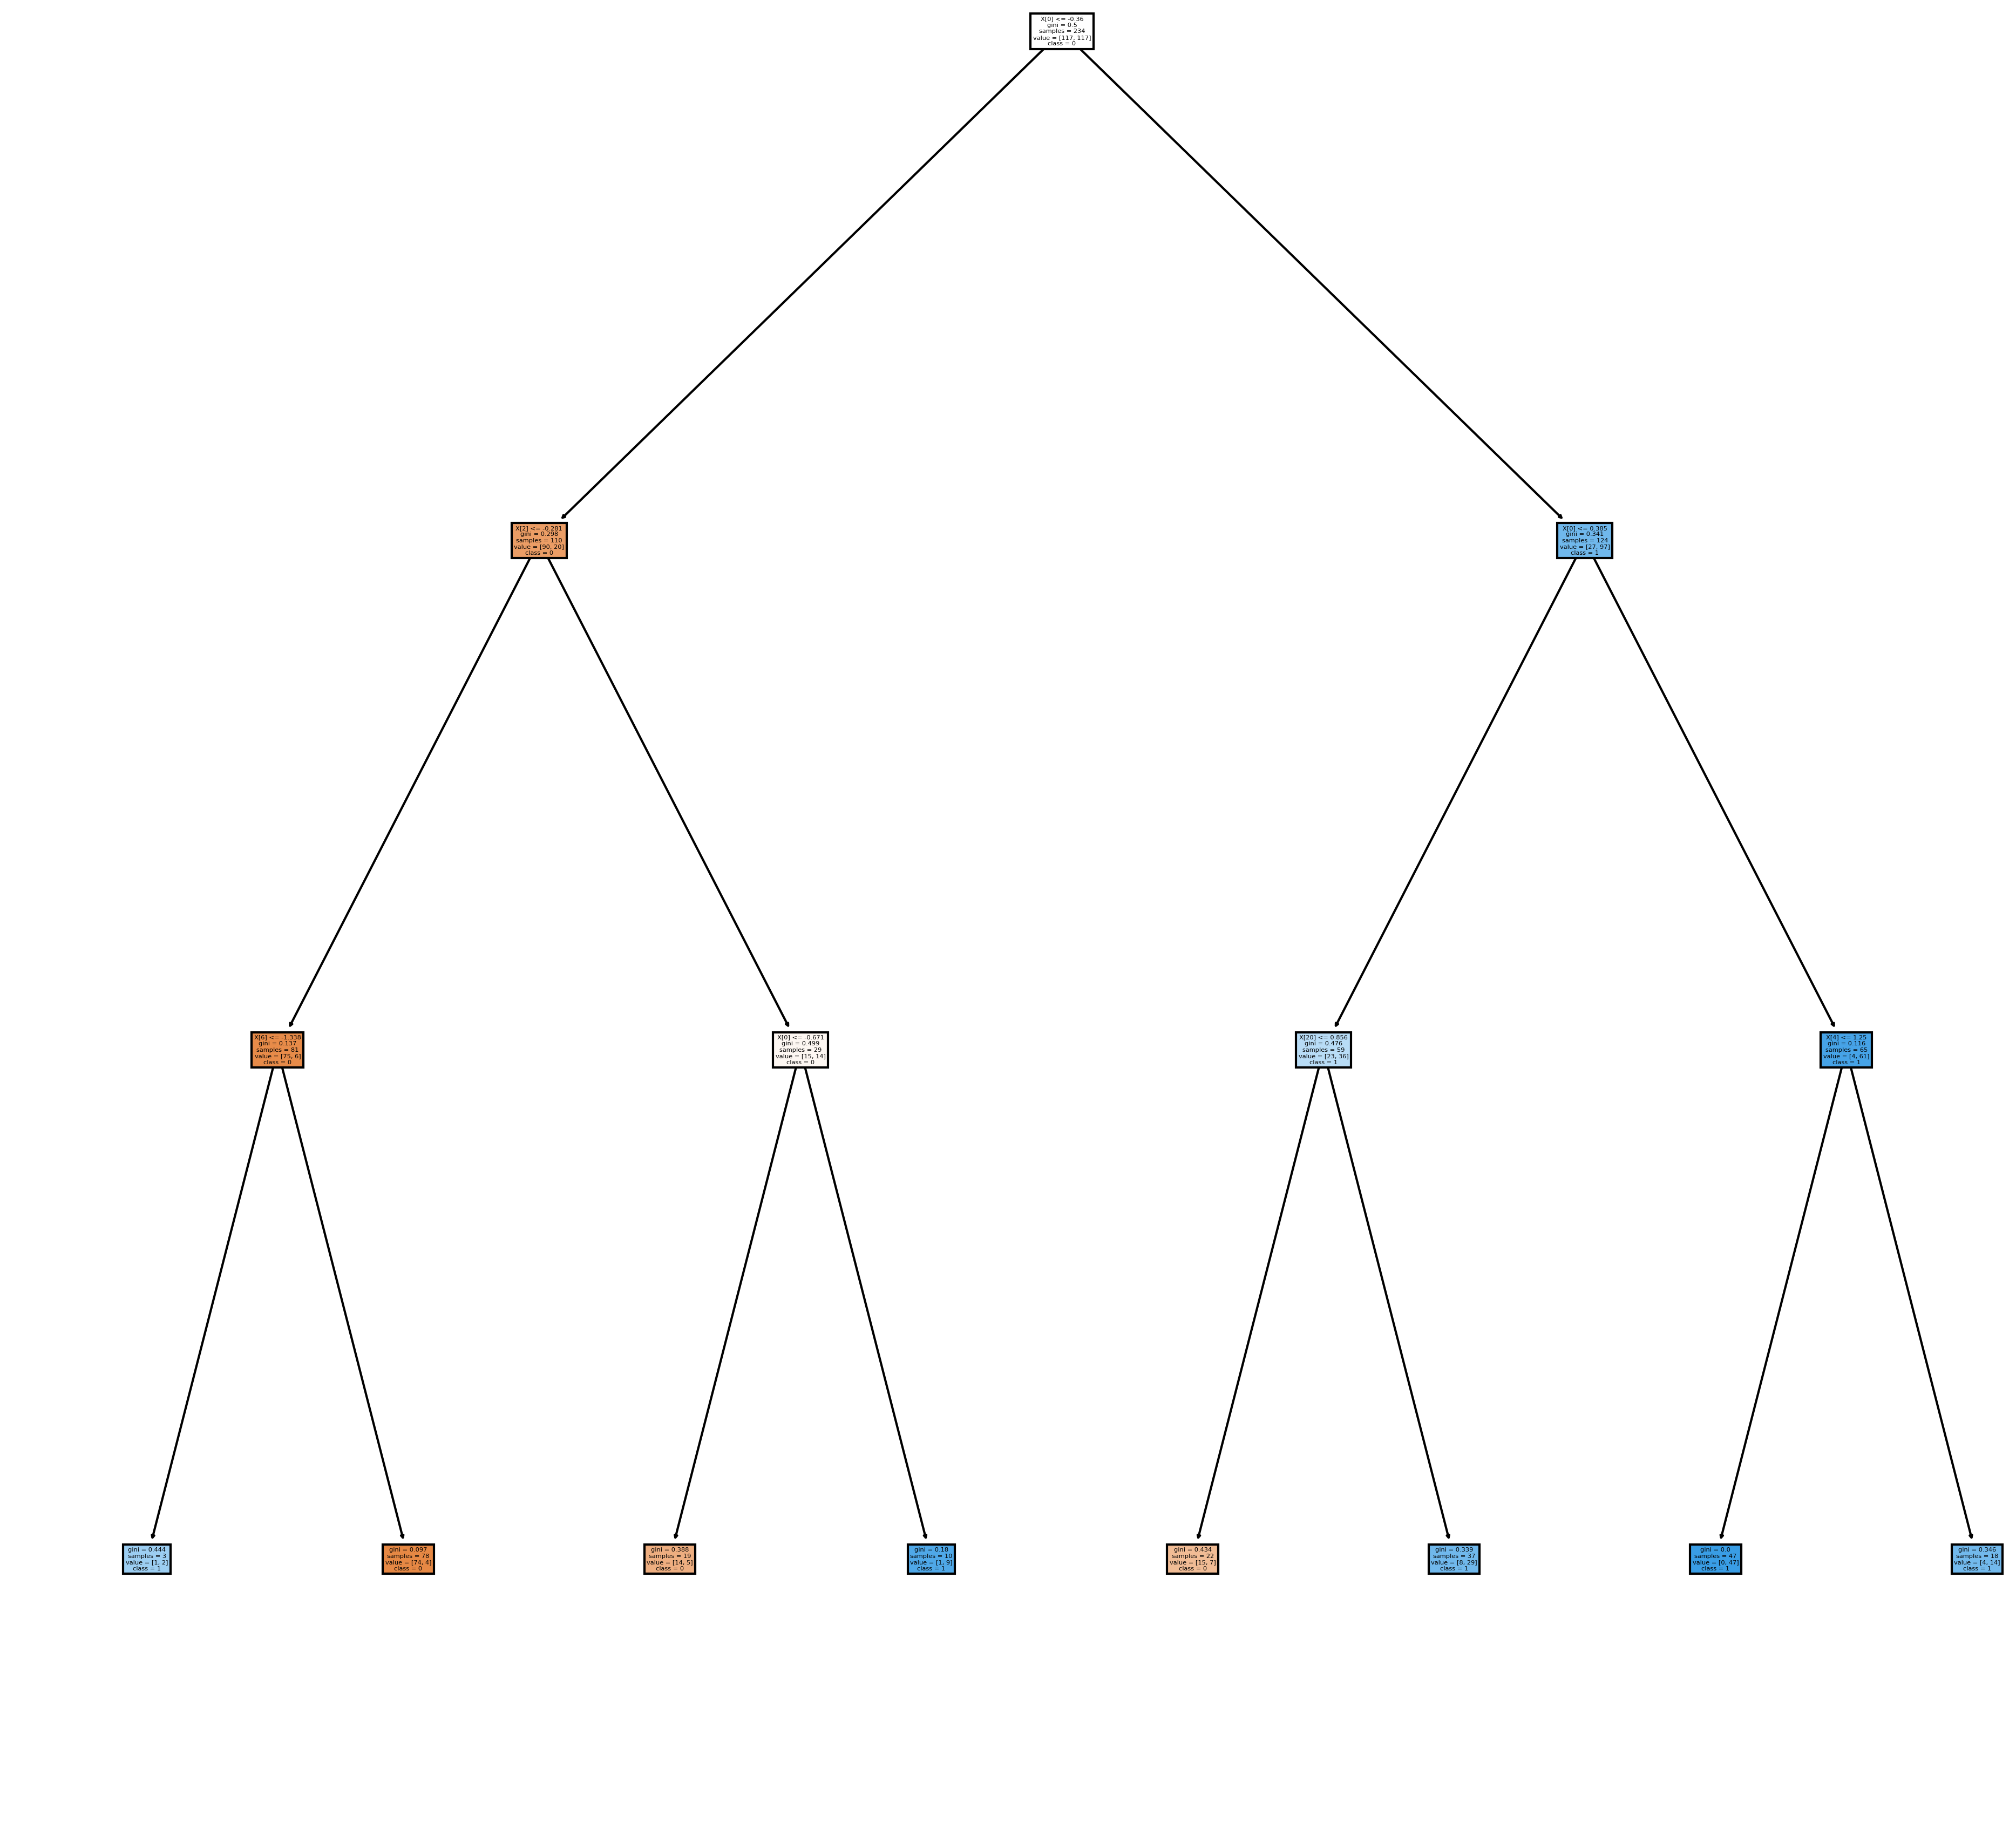

In [ ]:
from sklearn import tree
%matplotlib inline
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
temp=tree.plot_tree(tree_clf,class_names=['0','1'],filled = True)

save_fig("Trained Decision Tree")
plt.show()

### K Nearest Neighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

neigh_clf = KNeighborsClassifier(n_neighbors=3)
neigh_clf.fit(recruitment_final,recruitment_flabels)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
recruitment_predictions=neigh_clf.predict(recruitment_final)
accuracy_score(recruitment_flabels,recruitment_predictions)

0.905982905982906

## Better Evaluation Using Cross-Validation

### K Nearest Neighbour

In [ ]:
from sklearn.model_selection import cross_val_score

neigh_scores = cross_val_score(neigh_clf, recruitment_final,recruitment_flabels,
                         scoring="accuracy", cv=10)

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(neigh_scores)

Scores: [0.75       0.75       0.75       0.875      0.82608696 0.86956522
 0.91304348 0.91304348 0.95652174 0.91304348]
Mean: 0.8516304347826086
Standard deviation: 0.07404280489366769


### Support Vector Machine

In [ ]:
from sklearn.svm import SVC

svm_clf=SVC(kernel='linear',C=1)
svm_clf.fit(recruitment_final,recruitment_flabels)
recruitment_predictions=svm_clf.predict(recruitment_final)
accuracy_score(recruitment_flabels,recruitment_predictions)

0.9017094017094017

In [ ]:
svm_scores = cross_val_score(svm_clf, recruitment_final,recruitment_flabels,
                         scoring="accuracy", cv=10)

display_scores(svm_scores)

Scores: [0.79166667 0.75       0.83333333 0.91666667 0.86956522 0.7826087
 0.91304348 0.86956522 0.91304348 1.        ]
Mean: 0.8639492753623188
Standard deviation: 0.07206616462387798


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_clf=RandomForestClassifier(random_state=42)
forest_clf.fit(recruitment_final,recruitment_flabels)

RandomForestClassifier(random_state=42)

In [ ]:
recruitment_predictions=forest_clf.predict(recruitment_final)
accuracy_score(recruitment_flabels,recruitment_predictions)

1.0

In [ ]:
forest_scores = cross_val_score(forest_clf, recruitment_final,recruitment_flabels,
                         scoring="accuracy", cv=10)

display_scores(forest_scores)

Scores: [0.79166667 0.79166667 0.875      0.83333333 0.86956522 0.95652174
 0.91304348 0.86956522 0.95652174 1.        ]
Mean: 0.8856884057971015
Standard deviation: 0.06701160174108588


## The ROC Curve

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True) 

y_probas_forest = cross_val_predict(forest_clf,recruitment_final,recruitment_flabels, cv=3,
                                    method="predict_proba")

y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(recruitment_flabels,y_scores_forest)

In [ ]:
y_scores = cross_val_predict(sgd_clf,recruitment_final,recruitment_flabels, cv=3,
                             method="decision_function")

fpr_sgd, tpr_sgd, thresholds = roc_curve(recruitment_flabels, y_scores)

In [ ]:
y_probas_tree = cross_val_predict(tree_clf,recruitment_final,recruitment_flabels, cv=3,
                                    method="predict_proba")

y_scores_tree = y_probas_tree[:, 1] # score = proba of positive class
fpr_tree, tpr_tree, thresholds_tree = roc_curve(recruitment_flabels,y_scores_tree)

In [ ]:
y_scores = cross_val_predict(svm_clf,recruitment_final,recruitment_flabels, cv=3,
                             method="decision_function")

fpr_svm, tpr_svm, thresholds = roc_curve(recruitment_flabels, y_scores)

In [ ]:
y_probas_neigh = cross_val_predict(neigh_clf,recruitment_final,recruitment_flabels, cv=3,
                                    method="predict_proba")

y_scores_neigh = y_probas_neigh[:, 1] # score = proba of positive class
fpr_neigh, tpr_neigh, thresholds_tree = roc_curve(recruitment_flabels,y_scores_neigh)

Saving figure roc_curve_plot


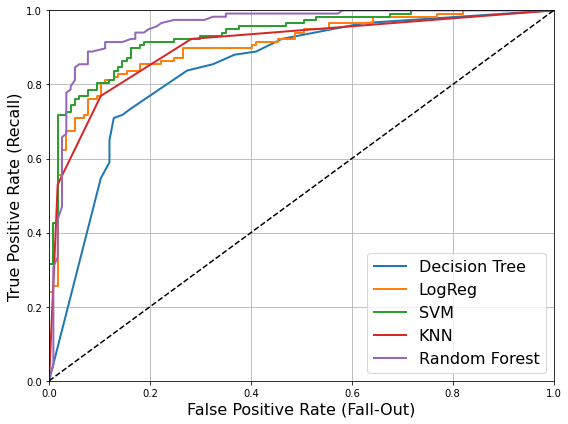

In [ ]:
plt.figure(figsize=(8, 6))     
plt.plot(fpr_tree, tpr_tree , linewidth=2, label="Decision Tree")                 
plt.plot(fpr_sgd, tpr_sgd, linewidth=2, label="LogReg")    
plt.plot(fpr_svm, tpr_svm, linewidth=2, label="SVM")   
plt.plot(fpr_neigh, tpr_neigh, linewidth=2, label="KNN")          
plot_roc_curve(fpr_forest, tpr_forest,"Random Forest")
          
plt.legend(loc="lower right", fontsize=16)
save_fig("roc_curve_plot")                                    
plt.show()

# Fine-Tune Your Model

As the best performing model was Random Forest Classifier. Lets tune the hyperparameters of the Random Forest using Randomized search.

## Randomized Search

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

rnd_search = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_distribs,
                                n_iter=100, cv=5, scoring='accuracy',
                                verbose=2, random_state=42)

rnd_search.fit(recruitment_final,recruitment_flabels)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END ...................max_features=7, n_estimators=180; total time=   0.3s
[CV] END ...................max_features=7, n_estimators=180; total time=   0.3s
[CV] END ...................max_features=7, n_estimators=180; total time=   0.3s
[CV] END ...................max_features=7, n_estimators=180; total time=   0.3s
[CV] END ...................max_features=7, n_estimators=180; total time=   0.3s
[CV] END ....................max_features=5, n_estimators=15; total time=   0.0s
[CV] END ....................max_features=5, n_estimators=15; total time=   0.0s
[CV] END ....................max_features=5, n_estimators=15; total time=   0.0s
[CV] END ....................max_features=5, n_estimators=15; total time=   0.0s
[CV] END ....................max_features=5, n_estimators=15; total time=   0.0s
[CV] END ....................max_features=3, n_estimators=72; total time=   0.1s
[CV] END ....................max_features=3, n

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f87f7806ad0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f87ed6f1ed0>},
                   random_state=42, scoring='accuracy', verbose=2)

In [ ]:
rnd_search.best_score_

0.9105457909343201

In [ ]:
rnd_search.best_params_

{'max_features': 6, 'n_estimators': 37}

In [ ]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"][:10], cvres["params"][:10]):
    print(mean_score, params)

0.880758556891767 {'max_features': 7, 'n_estimators': 180}
0.8594819611470861 {'max_features': 5, 'n_estimators': 15}
0.8936170212765957 {'max_features': 3, 'n_estimators': 72}
0.8721554116558741 {'max_features': 5, 'n_estimators': 21}
0.8933395004625346 {'max_features': 7, 'n_estimators': 122}
0.897872340425532 {'max_features': 3, 'n_estimators': 75}
0.8935245143385753 {'max_features': 3, 'n_estimators': 88}
0.8723404255319149 {'max_features': 5, 'n_estimators': 100}
0.8893617021276595 {'max_features': 3, 'n_estimators': 150}
0.795004625346901 {'max_features': 5, 'n_estimators': 2}


## Analyze the Best Models and Their Errors

In [ ]:
feature_importances = rnd_search.best_estimator_.feature_importances_
feature_importances

array([0.2093363 , 0.13492397, 0.12811617, 0.04190102, 0.07753776,
       0.14224279, 0.05029011, 0.00795681, 0.01800027, 0.03211109,
       0.03134749, 0.04067889, 0.02269674, 0.00901696, 0.00900985,
       0.00582785, 0.00745093, 0.0006797 , 0.00445201, 0.0078077 ,
       0.00714637, 0.00250662, 0.0089626 ])

In [ ]:
cat_encoder.categories_

[array(['F', 'M'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Mkt&Fin', 'Mkt&HR'], dtype=object),
 array(['Central', 'Others'], dtype=object),
 array(['Central', 'Others'], dtype=object),
 array(['Arts', 'Commerce', 'Science'], dtype=object)]

In [ ]:
extra_attribs = ["total_marks_across_career","Performance in MBA"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = full_pipeline.named_transformers_["cat"]

cat_one_hot_attribs=[]
for i in cat_encoder.categories_:
    cat_one_hot_attribs.extend(list(i[:]))

attributes = num_attribs + extra_attribs + cat_one_hot_attribs

Saving figure Feature Importance


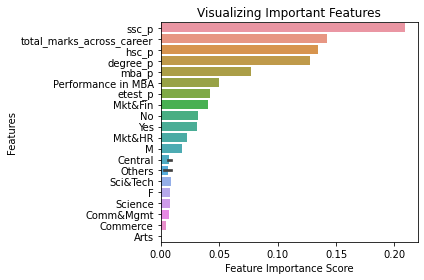

In [ ]:
import seaborn as sns

feature_imp = pd.Series(feature_importances,index=attributes).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
save_fig('Feature Importance')

plt.show()

In [ ]:
sorted(zip(feature_importances, attributes), reverse=True)

[(0.20933629573769014, 'ssc_p'),
 (0.14224279189869593, 'total_marks_across_career'),
 (0.1349239743485067, 'hsc_p'),
 (0.12811616966612488, 'degree_p'),
 (0.07753775659507418, 'mba_p'),
 (0.05029010658863192, 'Performance in MBA'),
 (0.041901021005219315, 'etest_p'),
 (0.040678893735906295, 'Mkt&Fin'),
 (0.03211108908900674, 'No'),
 (0.031347487495267196, 'Yes'),
 (0.022696742859215704, 'Mkt&HR'),
 (0.01800026654965226, 'M'),
 (0.009016964421115417, 'Central'),
 (0.00900984688892884, 'Others'),
 (0.0089625997762973, 'Sci&Tech'),
 (0.007956813464109742, 'F'),
 (0.007807704881264378, 'Science'),
 (0.0074509260859064305, 'Others'),
 (0.007146368487548286, 'Comm&Mgmt'),
 (0.0058278517238118, 'Central'),
 (0.004452009039093346, 'Commerce'),
 (0.002506616000080487, 'Others'),
 (0.0006797036628525244, 'Arts')]

# Evaluate on Test Set

In [ ]:
final_model = rnd_search.best_estimator_

X_test = strat_test_set.drop(["status","salary","sl_no"], axis=1)
y_test = strat_test_set["status"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

y_test=(y_test=='Placed').astype(np.int)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

print(accuracy_score(y_test,final_predictions))
print(precision_score(y_test,final_predictions))
print(recall_score(y_test,final_predictions))
confusion_matrix(y_test,final_predictions)

0.8837209302325582
0.8823529411764706
0.967741935483871


array([[ 8,  4],
       [ 1, 30]])

# Interpreting using XAI

In [ ]:
try:
    import shap
except:
    !pip install shap
    import shap

     |████████████████████████████████| 371 kB 4.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for shap: filename=shap-0.40.0-cp37-cp37m-linux_x86_64.whl size=509239 sha256=dba7dbea9f21c65dd6bc213e982d0d7211ba16aa92fbc5ef9b6febe3842b13fa
  Stored in directory: /root/.cache/pip/wheels/ec/35/84/e304841ac4b910bc95fe9a6e5302eb2507b4333728851dcbfb
Successfully built shap


In [ ]:
explainer = shap.TreeExplainer(final_model)

Saving figure Shap_summary_plot


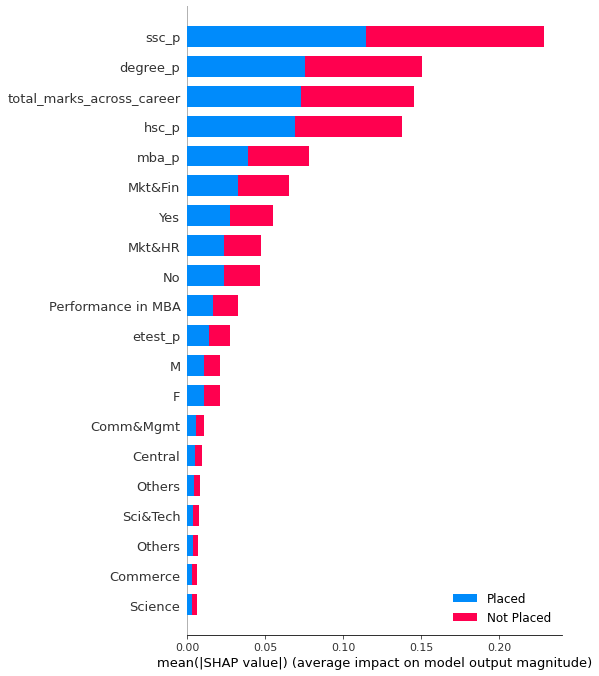

In [ ]:
shap_values = explainer.shap_values(recruitment_prepared)
shap.summary_plot(shap_values,recruitment_prepared,class_names=['Placed','Not Placed'], feature_names = attributes,show=False)

save_fig('Shap_summary_plot')
plt.show()

## Example 1

In [ ]:
choosen_instance,actual_label=pd.Series(X_test_prepared[10],index=attributes),y_test.iloc[10]
choosen_instance,actual_label

(ssc_p                        0.257278
 hsc_p                        0.210016
 degree_p                     1.683674
 etest_p                     -0.988857
 mba_p                        0.232661
 total_marks_across_career    0.589762
 Performance in MBA          -0.729244
 F                            0.000000
 M                            1.000000
 No                           0.000000
 Yes                          1.000000
 Mkt&Fin                      1.000000
 Mkt&HR                       0.000000
 Central                      1.000000
 Others                       0.000000
 Central                      1.000000
 Others                       0.000000
 Arts                         0.000000
 Commerce                     1.000000
 Science                      0.000000
 Comm&Mgmt                    1.000000
 Others                       0.000000
 Sci&Tech                     0.000000
 dtype: float64, 1)

Choosen instance refers to an Placed Candidate Male and a Commerce student. Let's see what and how our model predicts his recruitment

Saving figure SHAP Force Plot 1


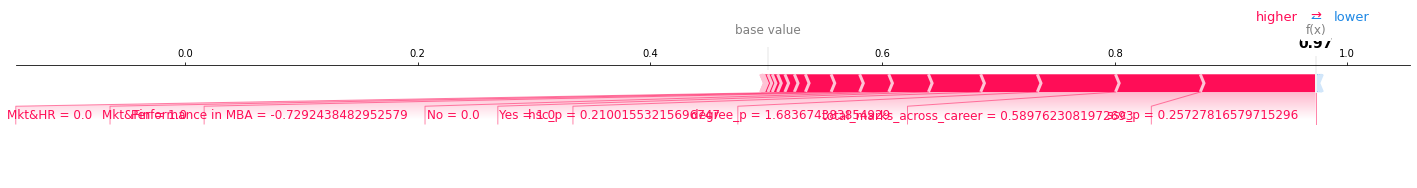

In [ ]:
shap_values = explainer.shap_values(choosen_instance)

shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance,matplotlib=True,show=False)

save_fig('SHAP Force Plot 1')
plt.show()

**Interpretation:**

What you see above is a force plot visualizing shapley values for the features. Feature values in pink cause to increase the prediction. Size of the bar shows the magnitude of the feature's effect. Feature values in blue cause to decrease the prediction. Sum of all feature SHAP values explain why model prediction was different from the baseline.

Model predicted 0.96 (Placed), whereas the base_value is 0.4985. Biggest effect is the total_marks_across_carrer of the candidate; This has increased his chances of recruited significantly. Next, degree percentage also increased his chances of recruited while being hsc board not being central decreased the chance of recruitment.

## Example 2

In [ ]:
choosen_instance,actual_label=pd.Series(X_test_prepared[2],index=attributes),y_test.iloc[2]
choosen_instance,actual_label

(ssc_p                       -1.635986
 hsc_p                       -2.518185
 degree_p                    -0.140506
 etest_p                     -0.763501
 mba_p                       -1.875308
 total_marks_across_career   -1.601862
 Performance in MBA          -1.304553
 F                            0.000000
 M                            1.000000
 No                           1.000000
 Yes                          0.000000
 Mkt&Fin                      1.000000
 Mkt&HR                       0.000000
 Central                      0.000000
 Others                       1.000000
 Central                      1.000000
 Others                       0.000000
 Arts                         0.000000
 Commerce                     0.000000
 Science                      1.000000
 Comm&Mgmt                    0.000000
 Others                       1.000000
 Sci&Tech                     0.000000
 dtype: float64, 0)

Choosen instance refers to an Placed Candidate Female and a Science student. Let's see what and how our model predicts his recruitment

Saving figure SHAP Force Plot 2


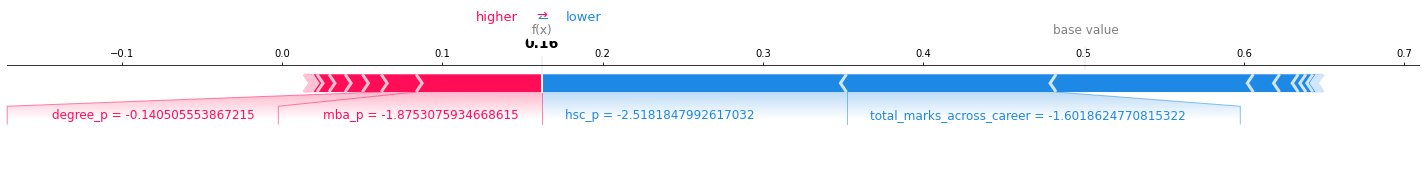

In [ ]:
shap_values = explainer.shap_values(choosen_instance)

shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance,matplotlib=True,show=False)

save_fig('SHAP Force Plot 2')
plt.show()

The model predicted 0.21 where as the base value is 0.4985. The biggest effect is low ssc percentage and also scored less in hsc. As obviously the gender doesn't played a major role here.

## Example 3

In [ ]:
choosen_instance,actual_label=pd.Series(X_test_prepared[15],index=attributes),y_test.iloc[15]
choosen_instance,actual_label

(ssc_p                        1.659765
 hsc_p                        0.080101
 degree_p                     1.642527
 etest_p                      1.677851
 mba_p                        1.047832
 total_marks_across_career    1.427761
 Performance in MBA           1.899866
 F                            0.000000
 M                            1.000000
 No                           1.000000
 Yes                          0.000000
 Mkt&Fin                      1.000000
 Mkt&HR                       0.000000
 Central                      0.000000
 Others                       1.000000
 Central                      0.000000
 Others                       1.000000
 Arts                         0.000000
 Commerce                     0.000000
 Science                      1.000000
 Comm&Mgmt                    1.000000
 Others                       0.000000
 Sci&Tech                     0.000000
 dtype: float64, 1)

Choosen instance is a candidate who has been placed and a male candidate with good ssc_p. Let's see what and how our model predicts his recruitment

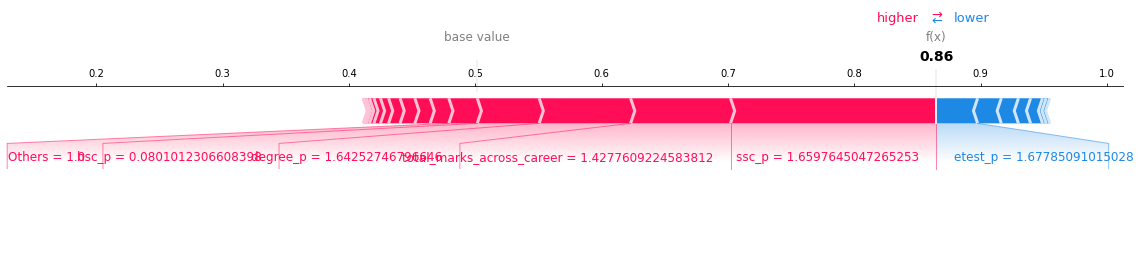

In [ ]:
shap_values = explainer.shap_values(choosen_instance)

shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance,matplotlib=True)

plt.show()

The model predicts his recruitment chance with 0.97. As obvious due to his total_marks and ssc_p pushed his chance of getting placed. Where lack of previous experience tried to reduce his chance but with less impact.

# Further Work

Saving the best model for future use

In [ ]:
from imblearn.pipeline import Pipeline

end_2_end_pipeline=Pipeline([
    ('preparation',full_pipeline),
    ('smote',SMOTE(random_state = 42)),
    ('classifier',RandomForestClassifier(**rnd_search.best_params_))           
])

end_2_end_pipeline.fit(recruitment,recruitment_labels)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('attribs_adder',
                                                                   CombinedAttributesAdder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['ssc_p', 'hsc_p', 'degree_p',
                                                   'etest_p', 'mba_p']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'workex',
                                                   'specialisation', 'ssc_b',
                                                   'hsc_b', 'hsc_s',
                                            

In [ ]:
import joblib
joblib.dump(end_2_end_pipeline, "classifier.pkl")

['classifier.pkl']

The model is being deployed in Heroku for realtime experience. https://recruitment-prediction.herokuapp.com/

# Conclusion and Future Work

From the interpretation of the model by XAI we can clearly see the importance of each features in predicitng the status of an candidate in placements. After analysing few algorithms we came to a conclusion that Random Forest gave a good results of 93% accuracy. Further we fine-tuned the hyperparameters present in random forest. The best model is been deployed in Heroku.


The Future Work is developing a regression models to find the likely salary for the candidate if placed.

# References

1. https://www.kaggle.com/vikumsw/explaining-random-forest-model-with-shapely-values
2. https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/linear_models/Sentiment%20Analysis%20with%20Logistic%20Regression.html
3. https://towardsdatascience.com/explainable-ai-xai-with-shap-multi-class-classification-problem-64dd30f97cea
4. https://scikit-learn.org/stable/modules/cross_validation.html
5. https://www.kaggle.com/benroshan/you-re-hired-analysis-on-campus-recruitment-data
6. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
7. https://www.youtube.com/watch?v=y4EMEpEnElQ&list=WL&index=20&t=4256s
8. https://www.youtube.com/watch?v=p_tpQSY1aTs&list=WL&index=19&t=4387s